## Project Title: Predicting Customer Churn: Uncovering Key Indicators and Retention Strategies


## Introduction

Customer churn, also known as customer attrition or customer turnover, refers to the percentage of customers who cease using a company's product or service within a given timeframe. Understanding and predicting customer churn is crucial for organizations as it directly impacts their profitability and growth. By identifying the factors that contribute to churn, businesses can develop effective retention strategies to mitigate this problem.

In this project, we will analyze a dataset containing various customer attributes such as gender, age, partner status, internet service provider, contract term, and payment method, among others. We aim to explore the relationship between these attributes and the likelihood of customer churn. By conducting a thorough analysis, we can uncover key indicators of churn and identify patterns that indicate a higher propensity for customers to leave the organization.

## Objectives

1.Build a classification model to predict customer churn and assess the likelihood of a customer leaving the organization.

2.Identify key indicators or factors that contribute to customer churn.

3.Formulate effective retention strategies based on the identified indicators to mitigate customer attrition.

## Hypothesis

**Null Hypothesis**: There is no significant relationship between the various customer attributes and the likelihood of customer churn.

**Alternatative Hypothesis**: There is a significant relationship between the various customer attributes and the likelihood of customer churn.

## Questions

1.What are the significant factors that influence customer churn?

2.Can we accurately predict customer churn based on available customer data?

3.How can we use the identified indicators to develop effective retention strategies?

4.Which customer segments are more likely to churn?

5.How can the organization leverage payment methods, contract terms, and billing preferences to reduce churn?

## Importing python libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
import pickle

warnings.filterwarnings('ignore')

## Data Loading
This dataset is a concatenation of three datasets extracted from different sources as follows:
1. SQL Database.
1. OneDrive.
1. Github repository.


In [2]:
df=pd.read_csv('LP2_Telco-churn-complete.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000381469727,False
1,1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.1500015258789,True
3,3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.64999389648438,True


## Exploratory Data Analysis(EDA)

In [3]:
df.shape

(7043, 22)

In [4]:
df.sample(15)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1307,1307,1866-NXPSP,Female,0,False,False,36,True,False,DSL,...,True,True,False,True,One year,True,Mailed check,75.550003,2680.14990234375,False
4087,1087,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,DSL,...,No,No,Yes,No,One year,Yes,Bank transfer (automatic),39.950000,1023.75,No
5285,242,3717-FDJFU,Male,0,No,Yes,5,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.450000,106.9,NaN
6481,1438,2263-SFSQZ,Male,0,Yes,Yes,51,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.950000,1222.25,NaN
5009,2009,7703-ZEKEF,Male,0,No,No,23,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.000000,1917.1,Yes
5434,391,7234-KMNRQ,Male,0,No,No,4,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.000000,73.45,NaN
2090,2090,6661-EIPZC,Female,0,True,True,48,False,NaN,DSL,...,False,True,False,False,Month-to-month,True,Credit card (automatic),29.500000,1423.050048828125,False
164,164,2907-ILJBN,Female,0,True,True,11,True,False,No,...,NaN,NaN,NaN,NaN,One year,False,Mailed check,20.600000,233.89999389648438,False
1294,1294,5027-XWQHA,Male,0,False,False,6,True,False,DSL,...,False,False,False,False,Month-to-month,False,Electronic check,44.750000,270.95001220703125,True
6984,1941,1449-XQEMT,Male,0,No,No,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.800000,58.15,NaN


In [5]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     6774 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    6392 non-null   object 
 11  OnlineBackup      6392 non-null   object 
 12  DeviceProtection  6392 non-null   object 
 13  TechSupport       6392 non-null   object 
 14  StreamingTV       6392 non-null   object 
 15  StreamingMovies   6392 non-null   object 
 16  Contract          7043 non-null   object 


In [7]:
# sum of null values
df.isnull().sum()

Unnamed: 0             0
customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [8]:
df.drop(columns={'Unnamed: 0'}, inplace = True)

In [9]:
df['Churn'].value_counts()


False    2219
No       1487
True      780
Yes       556
Name: Churn, dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.349998
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# categorical and numerical columns
cat=[]
num=[]

for column in df.columns:
    if df[column].nunique()> 9:
        num.append(column)
    else:
        cat.append(column)

In [12]:
cat

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [13]:
num

['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
# Select the columns with missing values
# columns_with_missing = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                #        'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']


# imputer = SimpleImputer(strategy='most_frequent')

# imputer.fit(df[columns_with_missing])

# Transform and replace the missing values in the DataFrame
# df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [15]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [16]:
df['Churn'].unique()

array(['False', 'True', nan, 'No', 'Yes'], dtype=object)

In [17]:
df['Churn'] = df['Churn'].replace({'False': 'No', 'True': 'Yes'})


## Univariate Analysis

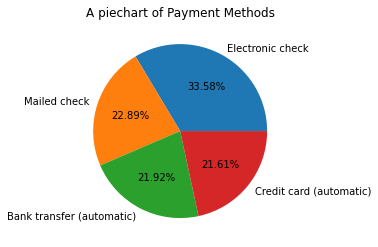

In [18]:
df['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.2f%%', title='A piechart of Payment Methods',label='');

**Electronic check** is the most used payment method by customers, followed by **mailed check**.

In [19]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

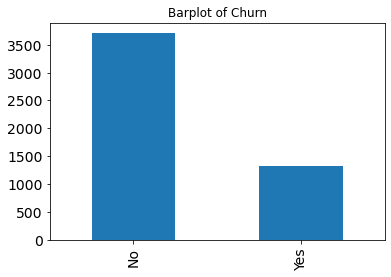

In [20]:
df['Churn'].value_counts().plot(kind='bar',title='Barplot of Churn',fontsize=14);

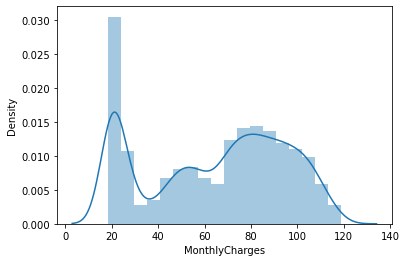

In [21]:
# distribution of Monthly Charges
sns.distplot(df['MonthlyCharges']);

In [22]:
df['MonthlyCharges'].skew()

-0.22052443095612614

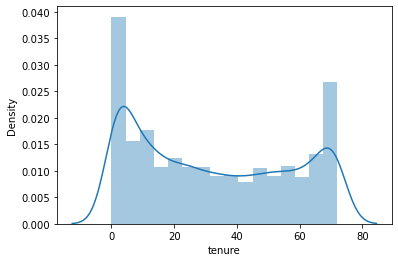

In [23]:
# distribution of Tenure
sns.distplot(df['tenure']);

## Bivariate and Multivariate Analysis 

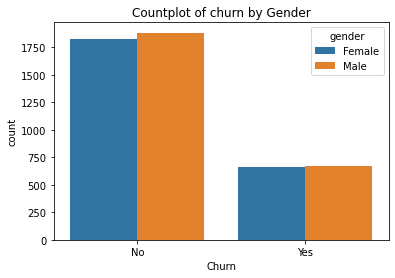

In [24]:
sns.countplot( x='Churn', hue='gender', data=df)
plt.title('Countplot of churn by Gender')
plt.show()

<AxesSubplot:xlabel='PaymentMethod', ylabel='gender'>

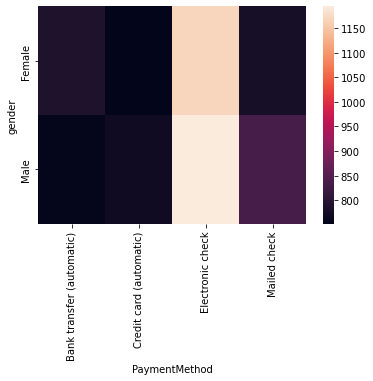

In [25]:
# heatmap of gender against payment method
sns.heatmap(pd.crosstab(df['gender'],df['PaymentMethod']))

## Feature Processing and Engineering

In [26]:
# dropping duplicates
df.duplicated().value_counts()

False    7043
dtype: int64

In [27]:
df.drop(columns={'customerID','gender'}, inplace=True)

I have dropped these columns because
1. customerID has no significance in our analysis.
1. There is no significant difference in the number of males and females consuming this product.

In [28]:
# Select the columns with missing values
columns_with_missing = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']


imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(df[columns_with_missing])

# Transform and replace the missing values in the DataFrame
df[columns_with_missing] = imputer.transform(df[columns_with_missing])

In [29]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Define a dictionary to map the values you want to replace
value_mapping = {
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
}

# Transform the relevant columns
for col in categorical_columns:
    if col in df.columns:
        df[col].replace(value_mapping, inplace=True)


In [30]:
X=df.drop(columns={'Churn'},axis=1)
y=df['Churn']
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000381469727
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.1500015258789
3,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.64999389648438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.100000,552.95
7039,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.050000,3496.3
7040,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.700000,93.7
7041,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.750000,7053.35


In [31]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042     No
Name: Churn, Length: 7043, dtype: object

In [32]:
# Define categorical and numerical columns
categorical_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_col = 'Churn'

# Strip leading and trailing spaces from all columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace empty strings in 'TotalCharges' with NaN
df['TotalCharges'] = df['TotalCharges'].replace('', float('nan'))

# Split features and target variable
X = df[categorical_cols + numerical_cols]
y = df[target_col]

## Feature encoding

In [33]:
# Perform one-hot encoding on categorical columns
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(X[categorical_cols])

# Get feature names after encoding
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a DataFrame with the encoded features and feature names
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=encoded_feature_names)

# Concatenate encoded features with numerical columns
X_encoded = pd.concat([X_encoded, X[numerical_cols]], axis=1)


In [34]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2,stratify=y, random_state=42)

In [35]:
# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X_train[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = imputer.transform(X_test[numerical_cols])

In [36]:
# Scale the numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Train_set Balancing

In [37]:
# Apply SMOTE to balance the train set
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [38]:
# Concatenate the balanced features and target variable into a single DataFrame
balanced_data = pd.concat([X_train_balanced, y_train_balanced], axis=1)

# Display the balanced data
balanced_data.head()


,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.397636,1.007309,0.734233,No
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,-0.823514,-1.032641,-0.810789,No
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.230564,-1.462541,-0.985477,No
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.397636,-1.314815,-0.519445,No
4,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.618787,1.334299,2.316218,No


## Machine Learning modeling
 **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model 001

## Create the model

In [39]:
# instantiate model
knn= KNeighborsClassifier()

## Train the model

In [40]:
# Use the .fit method
knn.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [41]:
models_trained=[]
models_trained.append(knn)

## Evaluate the model on the Evaluation dataset(Evalset)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.90      0.70      0.78      1142
         Yes       0.34      0.67      0.45       267

    accuracy                           0.69      1409
   macro avg       0.62      0.68      0.62      1409
weighted avg       0.80      0.69      0.72      1409



## Predict on an unknown dataset(Testset)

In [44]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model 002

## Create the model

In [45]:
# instantiate model
ada= AdaBoostClassifier()

## Train the model

In [46]:
ada.fit(X_train_balanced, y_train_balanced)

AdaBoostClassifier()

In [47]:
models_trained.append(ada)

## Evaluate the model on the Evaluation dataset(Evalset)

In [48]:
y_pred = ada.predict(X_test)

In [49]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.93      0.75      0.83      1142
         Yes       0.41      0.75      0.53       267

    accuracy                           0.75      1409
   macro avg       0.67      0.75      0.68      1409
weighted avg       0.83      0.75      0.77      1409



# Simple Model 003

In [50]:
# instantiate model
gb=GradientBoostingClassifier()

In [51]:
# train the model
gb.fit(X_train_balanced, y_train_balanced)

GradientBoostingClassifier()

In [52]:
models_trained.append(gb)

In [53]:
# evaluate the model on the evaluation dataset
y_pred = gb.predict(X_test)

In [54]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.90      0.82      0.86      1142
         Yes       0.43      0.59      0.50       267

    accuracy                           0.78      1409
   macro avg       0.66      0.70      0.68      1409
weighted avg       0.81      0.78      0.79      1409



# Simple Model 004

In [55]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

models_trained.append(rf)

# Train the model on the training set
rf.fit(X_train_balanced, y_train_balanced)

# evaluate the model on the evaluation dataset
y_pred = rf.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

          No       0.91      0.77      0.83      1142
         Yes       0.40      0.66      0.50       267

    accuracy                           0.75      1409
   macro avg       0.65      0.71      0.67      1409
weighted avg       0.81      0.75      0.77      1409



## Predict on an unkown dataset(Testset)

## Models comparison

In [56]:
metric=f1_score


In [57]:
unique_labels = np.unique(y_test)  # Get unique labels in y_test
print(unique_labels)  # Print the unique labels to identify the valid labels


['No' 'Yes']


In [58]:
# Update the pos_label value based on the valid labels
pos_label = unique_labels[0]  # Set pos_label to the first valid label

# Create a list of model names
model_names = ['KNeighborsClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier']

# Create lists to store the metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []
f2_scores = []


In [59]:
# Calculate the metrics for each model
for model in models_trained:
    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    f2 = fbeta_score(y_test, y_pred, beta=2, pos_label=pos_label)

    # Append the metrics to the respective lists
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    f2_scores.append(f2)


In [60]:
# Create a dictionary to store the metrics
results = {
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'F2 Score': f2_scores
}

In [61]:
# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Sort the DataFrame by each metric in descending order
sorted_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'], ascending=False)

In [62]:
sorted_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
2,GradientBoostingClassifier,0.777147,0.895038,0.821366,0.856621,0.835114
1,AdaBoostClassifier,0.751597,0.927646,0.752189,0.830754,0.781762
3,RandomForestClassifier,0.751597,0.905738,0.774081,0.834750,0.797258
0,KNeighborsClassifier,0.691270,0.901249,0.695271,0.784973,0.728574


## Hyperparameters tuning

Fine-tune the Top-k models (3 < k < 5) using a `GridSearchCV` (that is in sklearn.model_selection ) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [63]:
# Define the parameter grids for each model
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}


In [64]:
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
}

In [65]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7]
}

In [66]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}

In [67]:
# Create a list of tuples containing the models and their respective parameter grids
models_params = [
    (knn, param_grid_knn),
    (ada, param_grid_ada),
    (gb, param_grid_gb),
    (rf, param_grid_rf)
]


In [68]:
# Perform hyperparameter tuning for each model
best_models = []
f1_scores = []

for model, param_grid in models_params:
    grid_search = GridSearchCV(model, param_grid=param_grid, scoring='f1', cv=5)
    grid_search.fit(X_train_balanced, y_train_balanced)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models.append(best_model)
    
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, pos_label='Yes')
    f1_scores.append(f1)
    
    print(f"Best Hyperparameters - {type(model).__name__}:")
    print(best_params)
    print(f"F1 score - {type(model).__name__}: {f1}")
    print()

Best Hyperparameters - KNeighborsClassifier:
{'n_neighbors': 3, 'weights': 'uniform'}
F1 score - KNeighborsClassifier: 0.4686192468619247

Best Hyperparameters - AdaBoostClassifier:
{'learning_rate': 0.1, 'n_estimators': 50}
F1 score - AdaBoostClassifier: 0.5012345679012346

Best Hyperparameters - GradientBoostingClassifier:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
F1 score - GradientBoostingClassifier: 0.5049088359046283

Best Hyperparameters - RandomForestClassifier:
{'max_depth': 5, 'n_estimators': 50}
F1 score - RandomForestClassifier: 0.5121638924455826



In [69]:
# Compare the models based on F1 scores
model_names = ['KNeighborsClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'RandomForestClassifier']
model_comparison = pd.DataFrame({'Model_Name': model_names, 'F1_Score': f1_scores})
model_comparison = model_comparison.sort_values(by='F1_Score', ascending=False)

print("Models Comparison:")
print(model_comparison)

Models Comparison:
                   Model_Name  F1_Score
3      RandomForestClassifier  0.512164
2  GradientBoostingClassifier  0.504909
1          AdaBoostClassifier  0.501235
0        KNeighborsClassifier  0.468619


## Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [70]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app

In [71]:
# Create a dictionary to store the key components
key_components = {
    'model': model,
    'evaluation_results': results,
    # Add more key components as needed
}

# Specify the file path to save the dictionary
file_path = 'C:/Users/Wycliffe/Desktop/Projects/key_components.pickle'

# Save the dictionary as a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(key_components, file)

# Print a message to confirm the successful saving of the file
print(f"Key components saved as {file_path}")

Key components saved as C:/Users/Wycliffe/Desktop/Projects/key_components.pickle


# Hypothesis Testing

In [72]:
# Questions
                                                                                                                             

### 1.What are the significant factors that influence customer churn?

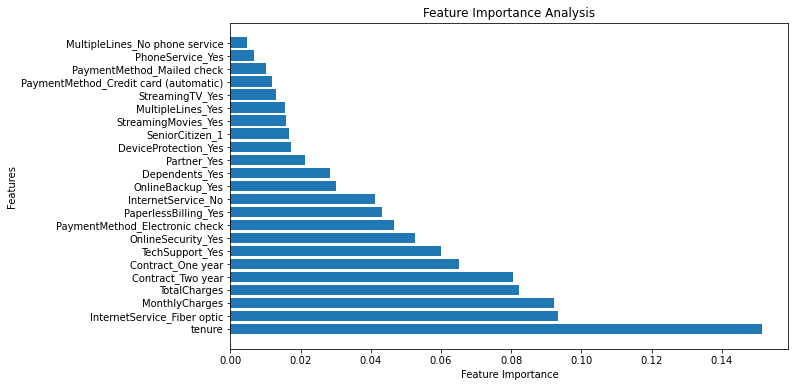

In [73]:
# Extract feature importances
importances = rf.feature_importances_

# Sort features based on importance scores
sorted_indices = importances.argsort()[::-1]
sorted_features = X_train_balanced.columns[sorted_indices]
sorted_scores = importances[sorted_indices]

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_scores, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

### 2.Can we accurately predict customer churn based on available customer data?

### 4. Which customer segments are more likely to churn?